# Introduction
### Background
According to the National Cancer Institute, a stroke occurs when brain tissue is damaged due to a loss of blood flow to parts of the brain [1]. Worldwide, strokes are responsible for an annual mortality rate of 5.5 million. This makes it the 2nd leading cause of death. After the age of 55, the risk of a stroke doubles every decade, making age the strongest determinant. The leading risk factor of stroke is hypertension in both developing and developed nations [2].

### Question
Can we accurately predict the likelihood of a stroke in a patient given a set of clinical features?

### Dataset description
The dataset that will be used is the Stroke Prediction Dataset, available via [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), it consists of 5110 observation with 12 different variables including gender, age, hypertension, heart disease, marriage status, type of work (self-employed/private/children/government/never worked), residence (rural or urban), average glucose levels, BMI, smoking status, and whether the patient has ever had a stroke.

# Methodology
To conduct our data analysis, we will begin by demonstrating that the dataset can be read within R. We will next clean/wrangle our data into a tidy format by removing any of the variables we decided below. We will then analyze our data to better educate ourselves of the different trends within our data sets. Then we will split our data using part of it to train our data, to evaluate the accuracy and to improve our model.


We will be performing a classification analysis to predict if a patient will have a stroke using these predictors:
| Variable               | Description                                                                  |
|------------------------|------------------------------------------------------------------------------|
| Gender                 | Whether the patient is a Male or Female                                      |
| Age                    | Age of the patient                                                           |
| Hypertension           | Whether the patient has been diagnosed with hypertension                     |
| Heart disease          | Whether the patient has been diagnosed with heart disease                    |
| Residence              | Whether the patient lives in a rural or urban area                           |
| Average glucose levels | Average glucose level in blood [mg/dL]                                       |
| BMI                    | Body mass index                                                              |
| Smoking status         | Whether the patient is a former smoker, has never smoked or currently smokes |
| Stroke                 | Whether the patient has had a stroke                                         |

**NOTE**: The above markdown table does not render when saved as an `.html` file, so we are writing it out here for clarity:
- **Gender**: Whether the patient is a Male or Female
- **Age**: Age of the patient
- **Hypertension**: Whether the patient has been diagnosed with hypertension
- **Heart disease**: Whether the patient has been diagnosed with heart disease
- **Residence**: Whether the patient lives in a rural or urban area
- **Average glucose levels**: Average glucose level in blood [mg/dL]                                       
- **BMI**: Body mass index
- **Smoking status**: Whether the patient is a former smoker, has never smoked or currently smokes
- **Stroke**: Whether the patient has had a stroke


We have opted to not use the following variables/column in our analysis:
- `id`: This is the ID of the patient in the dataset and does not contribute to stroke prediction
- `ever_married`: This boolean column describes whether the individual has ever been married. We do not feel as though this is a strong indicator of stroke and/or general health outcomes.
- `work_type`: This column held the following possible values: `{Private, Self-employed, Government job, Never worked, Children}`. We did not feel as though the level at which this data was collected would contribute to predicting stroke - perhaps if this was separated between jobs that require manual labor (“blue-collar” jobs) vs. desk jobs (“white-collar” jobs) it could have been more useful.

## Possible visualizations
- **Bar charts** can be used to visualize the distribution of gender, hypertension, heart disease and other among stroke and non-stroke groups
- **Scatter plots** can be used to visualize relationships between age, average glucose levels, or BMI, with stroke occurrence as the color of the point
- **Heatmaps** can be used in combination with scatter plots to better visualize the different weights points can have within our predictive model

# Expected outcomes and significance
### What do we expect to find
There is quite a bit of research being done on the risk factors of stroke; however, there is not a consensus on this. For example, (this study)[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2734855/] states that “smoking amplifies the positive association between BMI and CHD but not stroke” [3] conversely there are others studies who indicate that smoking “demonstrate[s] a strong association between smoking and stroke risk, with current smokers having at least a two- to fourfold increased risk of stroke” [4]. On the other hand, the notion of BMI being a good predictor of health is falling out of favor as of late. This is due to a conflict in findings which tell us that all cause mortality and BMI are strongly related [5], but higher levels of lean mass, which BMI fails to distinguish with fat mass [6], is inversely associated with mortality [7, 8]. We hope to discover a relationship between these factors (amongst others) on the risk of stroke in this dataset.

### Impacts of our findings
- **Early Intervention**: By being able to predict stroke risks, healthcare providers can better identify individuals who are at a higher risk of stroke before the deadly event happens. Early identification has the potential to significantly reduce the occurrence of strokes and further complication by allowing individuals to develop personalized treatment plans with medical professionals to improve their quality of life to minimize the chance.
- **Education + Awareness**: Our findings could be used to educate future generations of the risk factors that can lead to having a stroke. This can encourage them to live a healthier and positive lifestyle. Provides individuals, who may have risk factors that are genetic and not lifestyle, a better understanding of their risks. This will also benefit policy making, for example if the model identifies smoking as a strong predictor of a stroke, people in public health can prioritize initiatives that better control smoking.

### What future questions could this lead to
One key area for future exploration is the generalizability of the model in real-word scenarios. This is specifically important in the case if insurance companies/governments decide to use this technology as if the model isn’t generalizable it may lead to unfair outcomes and discriminate or have biases based on the original sample demographic it was trained with. As refined and well-trained the model can be, it's crucial to consider the potential exception and variation that arise due to the oddities of human biology and environmental factors. Therefore this research can lead to future research focusing on assessing the models ability across different populations in the world and healthcare systems.

# References
- [1] https://www.cancer.gov/publications/dictionaries/cancer-terms/def/stroke
- [2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6288566/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2734855/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2928253/
- [5] https://www.thelancet.com/journals/landia/article/PIIS2213-8587(18)30288-2/fulltext
- [6] https://www.sciencedirect.com/science/article/pii/S2405525521000017
- [7] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6348595/
- [8] https://www.medicalnewstoday.com/articles/265215

# Preliminary exploratory data analysis
### Loading Data and Dependencies

In [107]:
#Import all dependencies
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

In [108]:
#Create data dir and download csv into it
url <- "https://raw.githubusercontent.com/21chanas3/dsci100-group73/c9c58b88eca13be20286f8bf70dce4668b878247/data/healthcare-dataset-stroke-data.csv"
if (!dir.exists("data")) {
    dir.create("data")
}
download.file(url, "data/stroke.csv")

In [109]:
stroke <- read_csv("data/stroke.csv")

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning and Wrangling

In [114]:
#Rename columns to all lowercase
stroke_colnames <- stroke |> colnames() |> make.names() |> tolower()
colnames(stroke) <- stroke_colnames

In [111]:
#Convert Unknown's to NA
stroke <- stroke |> na_if("Unknown")

#Convert categorical vars to factors
stroke <- stroke |> mutate(gender = as_factor(gender), 
                 work_type = as_factor(work_type), 
                 residence_type = as_factor(residence_type), 
                 smoking_status = as_factor(smoking_status),
                 hypertension = as_factor(hypertension),
                 ever_married = as_factor(ever_married),
                 heart_disease = as_factor(heart_disease),
                 stroke = as_factor(stroke))

#Rename factor levels to nicer names
stroke$hypertension <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$heart_disease <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$stroke <- recode_factor(stroke$hypertension, "0" = "No", "1" = "Yes")
stroke$work_type <- recode_factor(stroke$work_type, "Govt_job" = "Government", "Never_worked" = "Never Worked")
stroke$smoking_status <- recode_factor(stroke$smoking_status, "formerly smoked" = "Formerly", "never smoked" = "Never", "smokes" = "Smokes")

In [113]:
#For some reason bmi is of type char probably because of N/A, converting to double here
stroke <- stroke |> mutate(bmi = as.numeric(as.character(bmi)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [115]:
#Dropping NA
stroke <- stroke |> drop_na()

In [116]:
#Creating test/train split here
stroke_split <- initial_split(stroke, prop = 0.8, strata = stroke)
stroke_training <- training(stroke_split)
stroke_testing <- testing(stroke_split)

In [117]:
#Getting summary stats for categorical vars here
stroke_married_stats <- stroke_training |> group_by(ever_married) |> summarise(value = n()) |> 
    rename("key" = "ever_married") |> mutate(column_name = "ever_married")
stroke_work_stats <- stroke_training |> group_by(work_type) |> summarise(value = n()) |> 
    rename("key" = "work_type") |> mutate(column_name = "work_type")
stroke_gender_stats <- stroke_training |> group_by(gender) |> summarise(value = n()) |> 
    rename("key" = "gender") |> mutate(column_name = "gender")
stroke_residence_type_stats <- stroke_training |> group_by(residence_type) |> summarise(value = n()) |> 
    rename("key" = "residence_type") |> mutate(column_name = "residence_type")
stroke_smoking_status_stats <- stroke_training |> group_by(smoking_status) |> summarise(value = n()) |> 
    rename("key" = "smoking_status") |> mutate(column_name = "smoking_status")
stroke_hypertension_stats <- stroke_training |> group_by(hypertension) |> summarise(value = n()) |> mutate(hypertension = as.character(hypertension)) |> 
    rename("key" = "hypertension") |> mutate(column_name = "hypertension") 
stroke_heart_disease_stats <- stroke_training |> group_by(heart_disease) |> summarise(value = n()) |> mutate(heart_disease = as.character(heart_disease)) |> 
    rename("key" = "heart_disease") |> mutate(column_name = "heart_disease")
stroke_stroke_stats <- stroke_training |> group_by(stroke) |> summarise(value = n()) |> mutate(stroke = as.character(stroke)) |> 
    rename("key" = "stroke") |> mutate(column_name = "stroke") 

In [118]:
#Getting summary stats for continuous vars here
stroke_numeric_cols_summary <- stroke |> 
    select(avg_glucose_level, bmi, age) |> 
    map_dfc(mean, na.rm = TRUE)

In [119]:
#Combining both summary stats
stroke_summary_stats <- stroke_numeric_cols_summary |> pivot_longer(age:avg_glucose_level, names_to = "column_name", values_to = "value")
stroke_summary_stats <- stroke_summary_stats |> mutate(key = "mean")
stroke_summary_stats <- bind_rows(stroke_summary_stats, 
                                  stroke_gender_stats, 
                                  stroke_residence_type_stats,
                                  stroke_smoking_status_stats,
                                  stroke_stroke_stats,
                                  stroke_hypertension_stats,
                                  stroke_heart_disease_stats,
                                  stroke_work_stats,
                                  stroke_married_stats)
stroke_summary_stats <- stroke_summary_stats[, c(1,3,2)]
stroke_summary_stats |> as_tibble() |> print(n = 25)


# A tibble: 23 × 3
   column_name       key            value
   <chr>             <chr>          <dbl>
 1 age               mean            48.6
 2 bmi               mean            30.3
 3 avg_glucose_level mean           108. 
 4 gender            Male          1043  
 5 gender            Female        1697  
 6 residence_type    Urban         1376  
 7 residence_type    Rural         1364  
 8 smoking_status    Formerly       686  
 9 smoking_status    Never         1472  
10 smoking_status    Smokes         582  
11 stroke            No            2414  
12 stroke            Yes            326  
13 hypertension      No            2414  
14 hypertension      Yes            326  
15 heart_disease     No            2414  
16 heart_disease     Yes            326  
17 work_type         Government     407  
18 work_type         Never Worked    11  
19 work_type         Private       1754  
20 work_type         Self-employed  510  
21 work_type         children        58  
22 ever_married

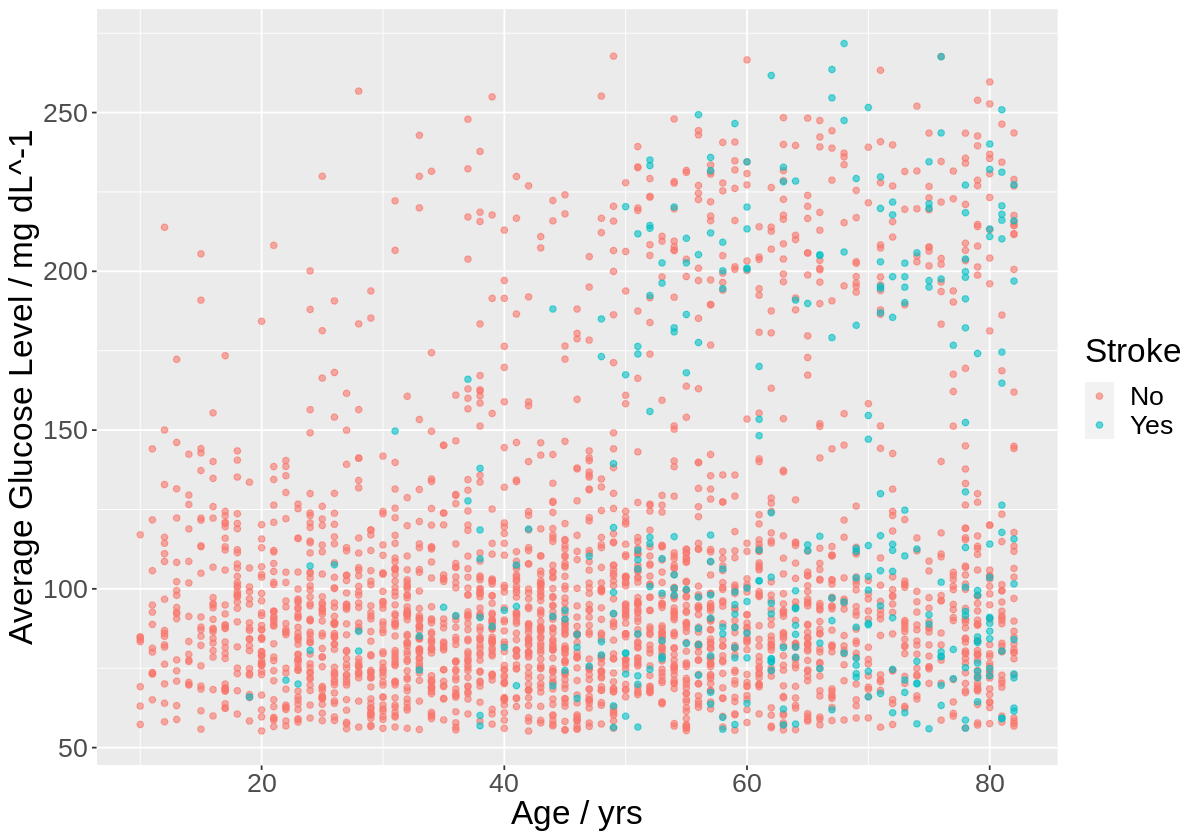

In [120]:
#Create visualization
options(repr.plot.width = 10, repr.plot.height = 7)
stroke_prelim_vis <- stroke_training |> ggplot(aes(x = age, y = avg_glucose_level, color = stroke)) + 
    geom_point(alpha = 0.6) +
    labs(x = "Age / yrs", y = "Average Glucose Level / mg dL^-1", color = "Stroke") +
    theme(text = element_text(size = 20))
stroke_prelim_vis

## Preparing Models

In [121]:
stroke_training

id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9046,Male,67,No,No,Yes,Private,Urban,228.69,36.6,Formerly,No
31112,Male,80,No,No,Yes,Private,Rural,105.92,32.5,Never,No
60182,Female,49,No,No,Yes,Private,Urban,171.23,34.4,Smokes,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10995,Male,76,Yes,Yes,Yes,Private,Rural,267.60,30.5,Never,Yes
6369,Male,59,Yes,Yes,Yes,Private,Rural,95.05,30.9,Never,Yes
68398,Male,82,Yes,Yes,Yes,Self-employed,Rural,71.97,28.3,Never,Yes


# Forward Selection Validation

We are looking to see if `ever_married` and/or `work_type` have a significant influence on the classification

In [ ]:
stroke_training <- stroke_training |> select(-id)

In [135]:
names <- colnames(stroke_training |> select(-work_type, -ever_married, -stroke))
base_formula_string <- paste("stroke", "~", paste(names, collapse="+"))
formulas = c(base_formula_string,
             paste(base_formula_string, "+ever_married"),
             paste(base_formula_string, "+work_type"),
             paste(base_formula_string, "+ever_married+work_type"))

In [136]:
stroke_classifier <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")

In [151]:
stroke_vfold <- vfold_cv(stroke_training, v = 5, strata = stroke)

In [147]:
stroke_recipe <- recipe(stroke ~ ., data = test) |> 
    step_scale(all_numeric_predictors()) |> 
    step_center(all_numeric_predictors()) |>
    step_dummy(all_nominal_predictors())

In [148]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 2))
vfold_metrics <- workflow() |> 
    add_recipe(stroke_recipe) |> 
    add_model(stroke_classifier) |> 
    tune_grid(resamples = stroke_vfold, grid = k_vals) |>
    collect_metrics()

In [149]:
accuracies <- vfold_metrics |>
  filter(.metric == "accuracy")

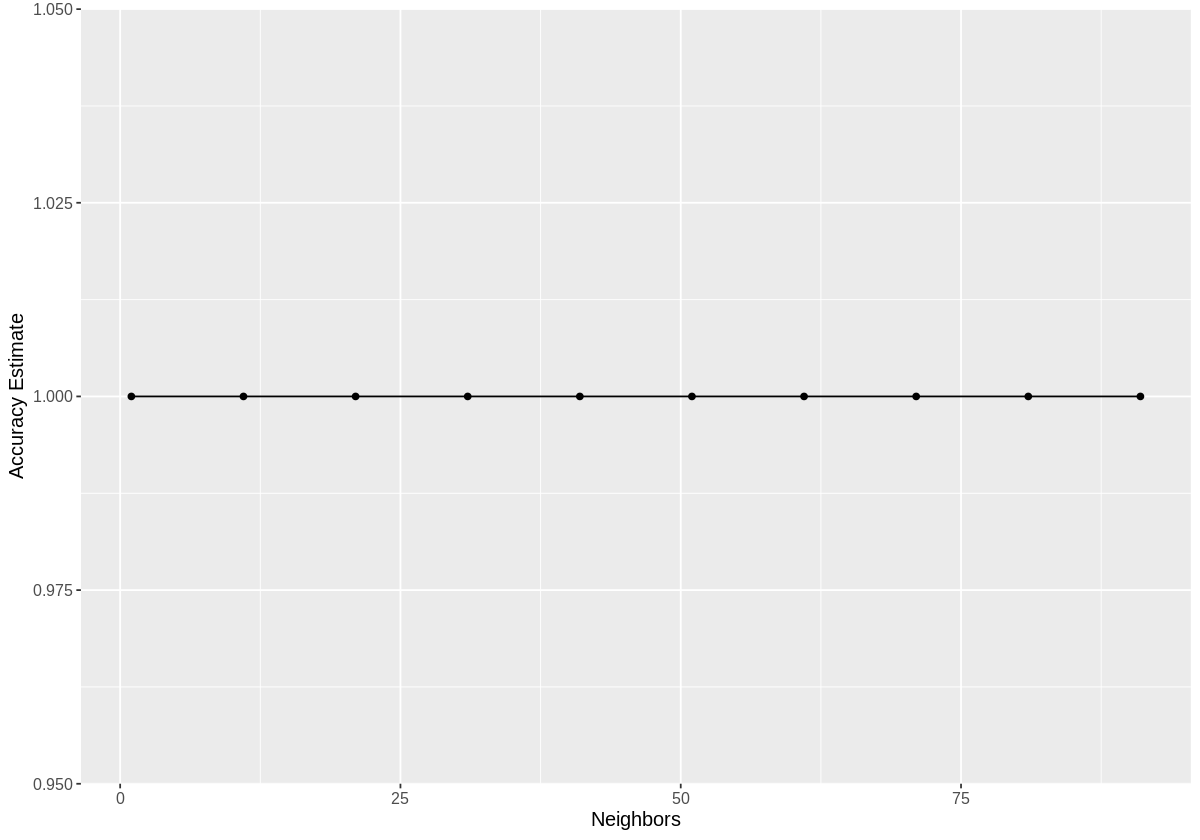

In [150]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k